In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# Questão 1

## Considere o conjunto de dados disponível em artificial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para $\hat{y} = f(x)$.

In [2]:
# Leitura dos dados
dados = np.genfromtxt('./artificial1d.csv', delimiter=',')

# 5 primeiros dados do arquivo
dados[:5]

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695]])

### a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

In [3]:
# Definição dos parâmetros do modelo
x = np.c_[np.ones(dados.shape[0]), dados[:,0]]
y = dados[:,1]

# Cálculo das matrizes
w = np.linalg.inv(x.T @ x) @ x.T @ y

# Predição do valor
pred = x @ w

# Parâmetros de análise da precisão do modelo
mse = (np.mean((y - pred)**2))
mre = np.mean(np.abs((y - pred)/y))

# Variável para ajudar na plotagem dos dados
x_test = np.c_[np.ones(100), np.linspace(x[:,1].min(), x[:,1].max(), 100)]

print(f"RMSE: {mse}")
print(f"MRE:  {mre}")

RMSE: 0.21340090132936987
MRE:  0.5865122801771744


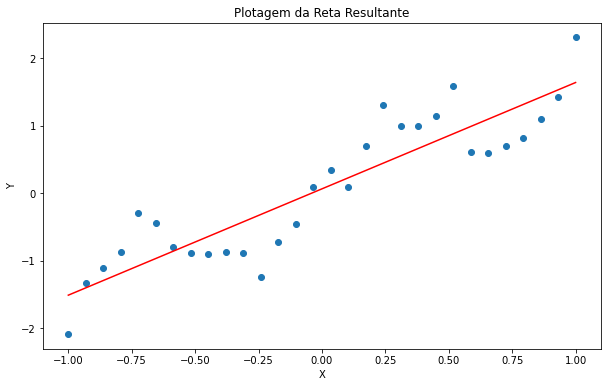

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,1], y)
plt.plot(x_test[:,1], x_test@w, color="red");
plt.title("Plotagem da Reta Resultante")
plt.xlabel("X")
plt.ylabel("Y");

### b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

$$\boldsymbol{w}(t) = \boldsymbol{w}(t-1) + \alpha \frac{1}{N}\sum_{i=1}^{N} e_i(t-1) \boldsymbol{x}_i\\
\text{em que } e_i(t-1) = y_i - \boldsymbol{w}^{\top}(t-1)\boldsymbol{x}_i$$


In [5]:
# Escalonamento dos dados de x
x_base = dados[:,0]
x_escalado = x_base
x_media = x_escalado.mean(axis=0)
x_desvio = x_escalado.std(axis=0)
x_escalado = (x_escalado - x_media) / x_desvio
x = np.c_[np.ones(x_escalado.shape[0]), x_escalado]

# Escalonamento dos dados de y
y_base = dados[:,[1]]
y_media = y_base.mean()
y_desvio = y_base.std()
y = (y_base - y_media) / y_desvio

n = x.shape[0]

# Parâmetros de configuração do modelo
alpha = 0.1
epocas = 100

# Matriz de pesos
w = np.zeros((x.shape[1], 1))

# Lista para guardar os erros ao longo do processo
mse_lista = list()

# Loop de aprendizagem
for epoca in range(epocas):
    error = y - x @ w
    w += alpha * x.T @ error / n
    
    mse = np.mean((y - x @ w) ** 2)
    mse_lista.append(mse)
    
pred = x @ w
pred = pred * y_desvio + y_media
mse = (np.mean((y_base - pred)**2))
mre = np.mean(np.abs((y_base - pred)/y))

print(f"Vetor de Parâmetros: \n\n{w}")
print(f"\nMSE dos dados base: {mse:.8f}")
print(f"MRE dos dados base:  {mre:.8f}")

Vetor de Parâmetros: 

[[-5.47252653e-17]
 [ 8.97470068e-01]]

MSE dos dados base: 0.21340090
MRE dos dados base:  0.77510939


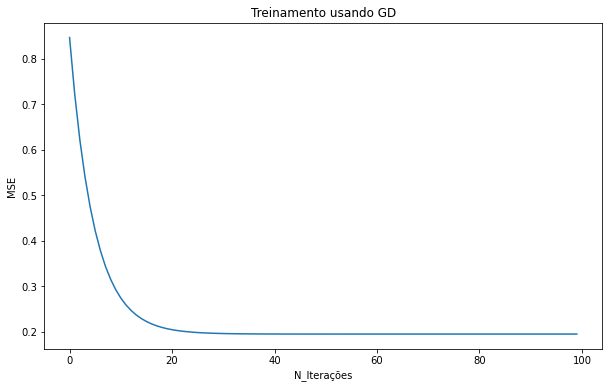

In [6]:
plt.figure(figsize=(10,6))
plt.plot(mse_lista)
plt.ylabel("MSE")
plt.xlabel("N_Iterações")
plt.title("Treinamento usando GD");

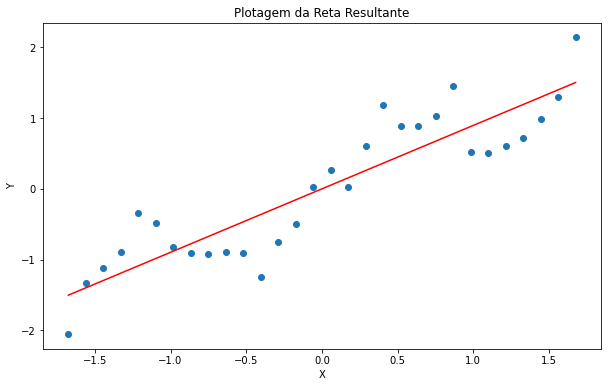

In [7]:
x_test = np.c_[np.ones(100), np.linspace(x[:,1].min(), x[:,1].max(), 100)]
plt.figure(figsize=(10,6))
plt.scatter(x[:,1], y)
plt.plot(x_test[:,1], x_test@w, color="red");
plt.title("Plotagem da Reta Resultante")
plt.xlabel("X")
plt.ylabel("Y");

### c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.

$$\boldsymbol{w}(t) = \boldsymbol{w}(t-1) + \alpha e_i(t-1) \boldsymbol{x}_i\\
\text{em que } e_i(t-1) = y_i - \boldsymbol{w}^{\top}(t-1)\boldsymbol{x}_i$$

In [8]:
# Escalonamento dos dados de x
x_base = dados[:,0]
x_escalado = x_base
x_media = x_escalado.mean(axis=0)
x_desvio = x_escalado.std(axis=0)
x_escalado = (x_escalado - x_media) / x_desvio
x = np.c_[np.ones(x_escalado.shape[0]), x_escalado]

# Escalonamento dos dados de y
y_base = dados[:,[1]]
y_media = y_base.mean()
y_desvio = y_base.std()
y = (y_base - y_media) / y_desvio

# Parâmetros de configuração do modelo
alpha = 0.001
epocas = 200

# Matriz de pesos
w = np.zeros((x.shape[1], 1))

# Lista para guardar os erros ao longo do processo
mse_lista = list()

# Loop de aprendizagem
for epoca in range(epocas):
    for i in np.random.permutation(y.shape[0]):
        xi = x[[i]].T
        error = y[i] - w.T @ xi 
        w += alpha * error * xi 

        mse = np.mean((y - x @ w) ** 2)
        mse_lista.append(mse)
    
pred = x @ w
pred = pred * y_desvio + y_media
mse = (np.mean((y_base - pred)**2))
mre = np.mean(np.abs((y_base - pred)/y))

print(f"Vetor de Parâmetros: \n\n{w}")
print(f"\nRMSE dos dados base: {mse:.8f}")
print(f"MRE dos dados base:  {mre:.8f}")

Vetor de Parâmetros: 

[[-1.77719117e-04]
 [ 8.95283167e-01]]

RMSE dos dados base: 0.21340630
MRE dos dados base:  0.77356254


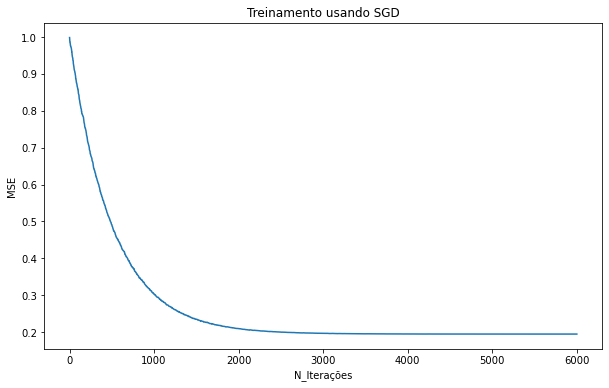

In [9]:
plt.figure(figsize=(10,6))
plt.plot(mse_lista)
plt.ylabel("MSE")
plt.xlabel("N_Iterações")
plt.title("Treinamento usando SGD");

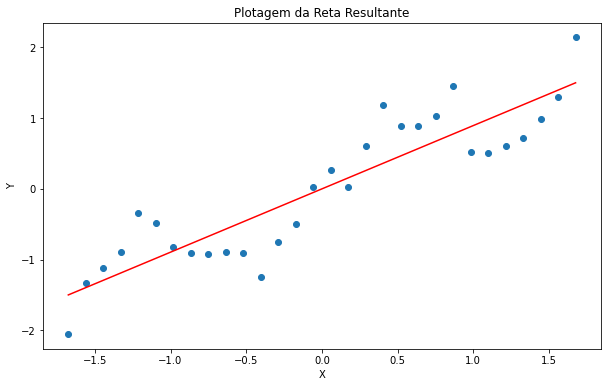

In [10]:
x_test = np.c_[np.ones(100), np.linspace(x[:,1].min(), x[:,1].max(), 100)]
plt.figure(figsize=(10,6))
plt.scatter(x[:,1], y)
plt.plot(x_test[:,1], x_test@w, color="red");
plt.title("Plotagem da Reta Resultante")
plt.xlabel("X")
plt.ylabel("Y");

# Questão 2

## Considere o conjunto de dados disponível em boston.csv, organizado em 14 colunas, sendo as 13 primeiras colunas os atributos e a última coluna a saída. Os 13 atributos são usados na predição de preços de casas em Boston na década de 1970. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset.

In [11]:
# Leitura dos dados
dados = np.genfromtxt('./boston.csv', delimiter=',')

# 5 primeiros dados do arquivo
dados[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00, 2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00, 2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00, 3.4700e+01],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00, 3.3400e+01],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00, 3.6200e+01]])

In [12]:
def polyFeatures(X, degree=2):
    
    features = np.hstack([X**(i+1) for i in range(degree)])
    features = np.c_[np.ones(len(features)), features]
    
    return features

In [13]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_base = dados[:, :-1]
x_escalado = x_base
x = x_escalado

y_base = dados[:,[-1]]
y = y_base

# Separação treino e teste
np.random.seed(52)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.2)

treino_x = scaler_x.fit_transform(treino_x)
teste_x = scaler_x.transform(teste_x)
treino_y = scaler_y.fit_transform(treino_y)

hist_rmse_treino = list()
hist_rmse_teste = list()

for grau in range(1, 12):
    treino_x_poly = polyFeatures(treino_x, grau)
    teste_x_poly = polyFeatures(teste_x, grau)

    w = np.linalg.inv(treino_x_poly.T @ treino_x_poly + 1e-10*np.eye(treino_x_poly.shape[1])) @ treino_x_poly.T @ treino_y

    pred_treino = treino_x_poly @ w
    pred_teste = teste_x_poly @ w
    
    pred_treino = scaler_y.inverse_transform(pred_treino)
    pred_teste = scaler_y.inverse_transform(pred_teste)

    rmse_treino = np.sqrt(np.mean((scaler_y.inverse_transform(treino_y) - pred_treino)**2))
    rmse_teste = np.sqrt(np.mean((teste_y - pred_teste)**2))

    hist_rmse_treino.append(rmse_treino)
    hist_rmse_teste.append(rmse_teste)

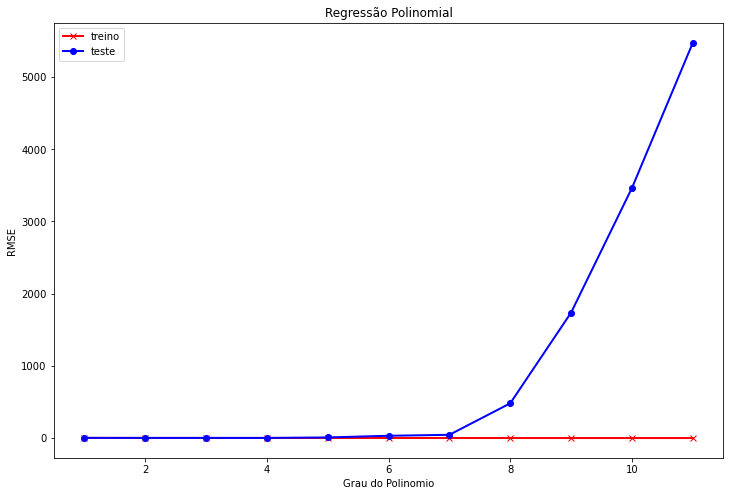

In [14]:
g_pol = np.linspace(1, 11, 11)
plt.figure(figsize=(12,8))
plt.plot(g_pol, hist_rmse_treino, 'rx-', label="treino", linewidth=2.0)
plt.plot(g_pol, hist_rmse_teste, 'bo-', label="teste", linewidth=2.0)
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Grau do Polinomio")
plt.title("Regressão Polinomial");

## Regularização L2

In [15]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_base = dados[:, :-1]
x_escalado = x_base
x = x_escalado

y_base = dados[:,[-1]]
y = y_base

# Separação treino e teste
np.random.seed(52)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.2)

treino_x = scaler_x.fit_transform(treino_x)
teste_x = scaler_x.transform(teste_x)
treino_y = scaler_y.fit_transform(treino_y)

hist_rmse_treino = list()
hist_rmse_teste = list()

for grau in range(1, 12):
    treino_x_poly = polyFeatures(treino_x, grau)
    teste_x_poly = polyFeatures(teste_x, grau)

    w = np.linalg.inv(treino_x_poly.T @ treino_x_poly + 10*np.eye(treino_x_poly.shape[1])) @ treino_x_poly.T @ treino_y

    pred_treino = treino_x_poly @ w
    pred_teste = teste_x_poly @ w
    
    pred_treino = scaler_y.inverse_transform(pred_treino)
    pred_teste = scaler_y.inverse_transform(pred_teste)

    rmse_treino = np.sqrt(np.mean((scaler_y.inverse_transform(treino_y) - pred_treino)**2))
    rmse_teste = np.sqrt(np.mean((teste_y - pred_teste)**2))

    hist_rmse_treino.append(rmse_treino)
    hist_rmse_teste.append(rmse_teste)

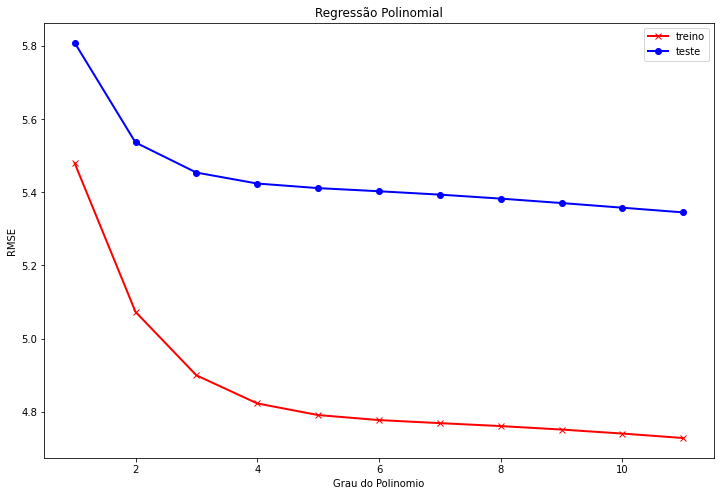

In [16]:
g_pol = np.linspace(1, 11, 11)
plt.figure(figsize=(12,8))
plt.plot(g_pol,hist_rmse_treino, 'rx-', label="treino", linewidth=2.0)
plt.plot(g_pol, hist_rmse_teste, 'bo-', label="teste", linewidth=2.0)
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Grau do Polinomio")
plt.title("Regressão Polinomial");